<a href="https://colab.research.google.com/github/ronakkhandelwal19/MLproject/blob/main/Hand_Written_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist


In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


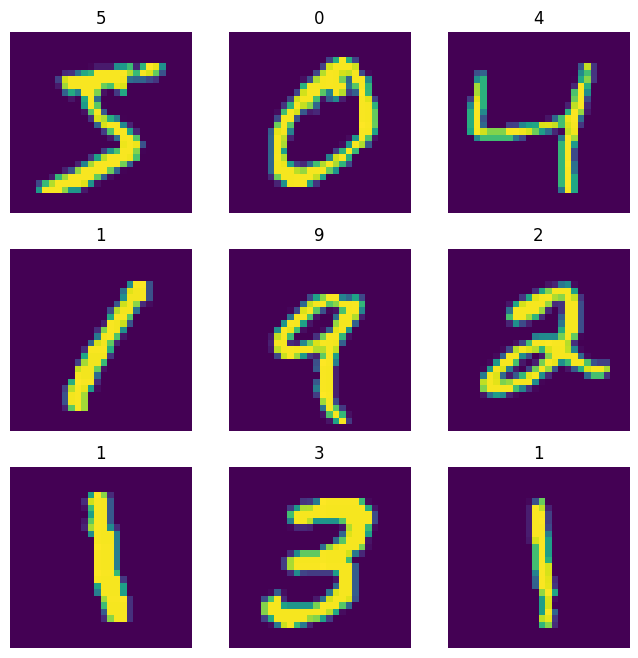

In [5]:
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.axis('off')

In [7]:
x_train = tf.keras.utils.normalize(x_train, axis =1)
x_test = tf.keras.utils.normalize(x_test, axis =1)

Building Model

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics =['accuracy'])

In [11]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs = 15)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8577 - loss: 0.5025 - val_accuracy: 0.9554 - val_loss: 0.1423
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9625 - loss: 0.1249 - val_accuracy: 0.9659 - val_loss: 0.1054
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9754 - loss: 0.0810 - val_accuracy: 0.9729 - val_loss: 0.0951
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9814 - loss: 0.0580 - val_accuracy: 0.9691 - val_loss: 0.1045
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9852 - loss: 0.0451 - val_accuracy: 0.9695 - val_loss: 0.1091
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9895 - loss: 0.0341 - val_accuracy: 0.9720 - val_loss: 0.0959
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9913 - loss: 0.0270 - val_accuracy: 0.9718 - val_loss: 0.1155
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9912 - loss: 0.0253 - val_ac

In [12]:
import cv2

In [19]:
image = cv2.imread('8.png')[:,:,0]
image = np.invert(np.array([image]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
8


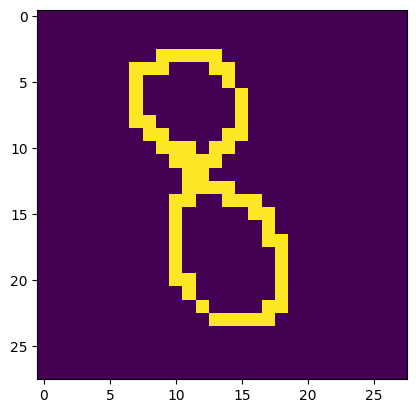

In [20]:
output = model.predict(image)
plt.imshow(image[0])
print(np.argmax(output))

In [21]:
model.save('/content/hand_written_Digit_recog_model.keras')

In [22]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 109.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 109.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.5 MB/s eta 0:00:00


In [23]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙
added 22 packages in 3s
⠙
⠙3 packages are looking for funding
⠙  run `npm fund` for details
⠙

In [30]:
# Install required packages
!pip install streamlit pyngrok --quiet

# Kill any running Streamlit
!pkill streamlit

# Set up Ngrok auth token (replace with yours from https://dashboard.ngrok.com/get-started/setup)
from pyngrok import ngrok
ngrok.set_auth_token("2w2fgJPbxNy7dUizv3gUKrAk23I_3TKFRKg3f3p4CC4YjhTAp")  # <-- Replace this

# Run Streamlit in background
!streamlit run app.py &>/content/log.txt &

# Connect ngrok to the Streamlit port
# Instead of just port, provide a config for an http tunnel
public_url = ngrok.connect(8501, "http")
print(f"Your Streamlit app is live at: {public_url}")

Your Streamlit app is live at: NgrokTunnel: "https://97fc-34-86-48-179.ngrok-free.app" -> "http://localhost:8501"
